## 課題1

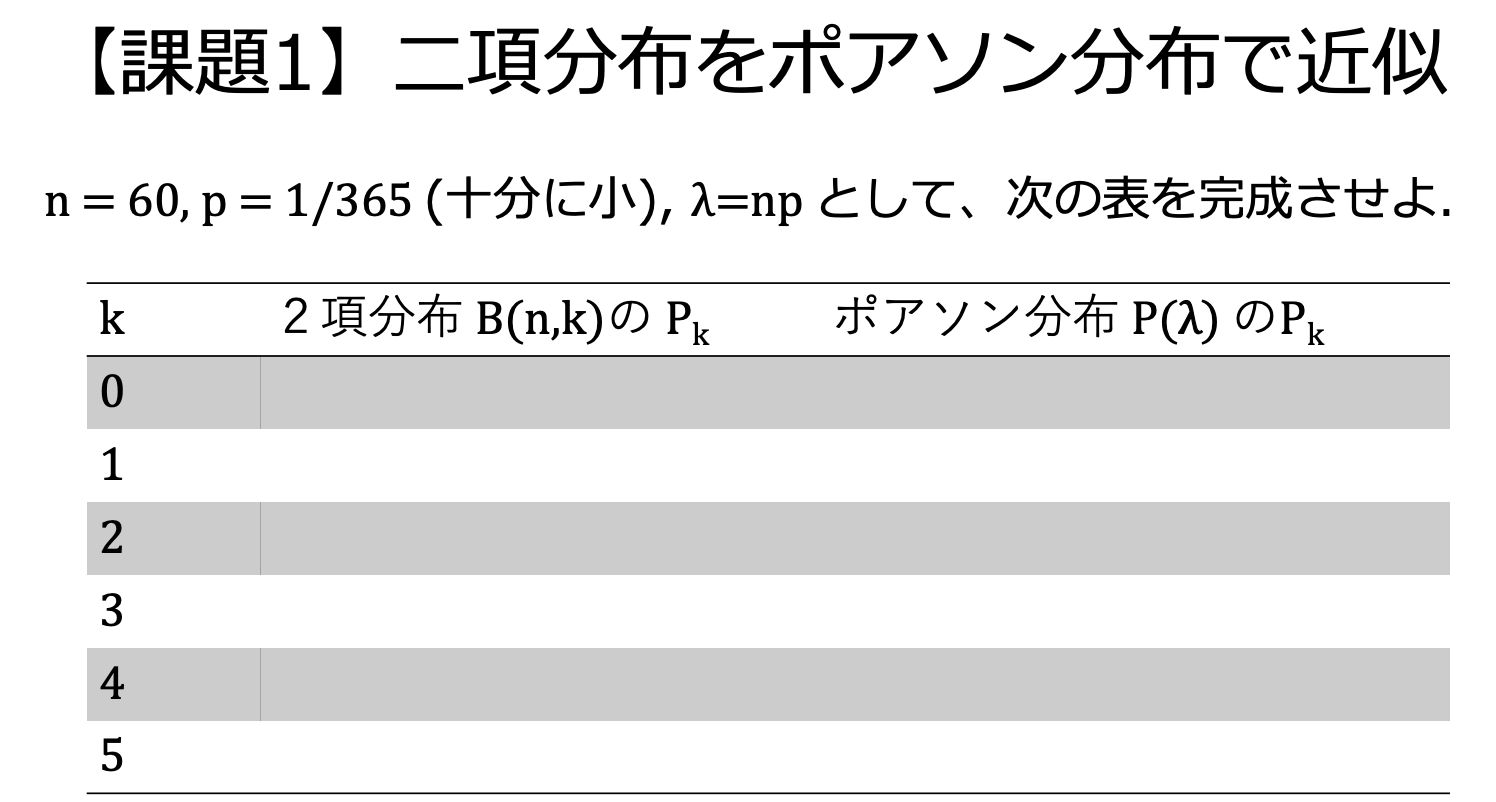

In [1]:
import math
import pandas as pd
p = 1/365
lambda_ = 60 * p

df = []
for k in range(6):
    pk1 = math.factorial(60) // (math.factorial(60 - k) * math.factorial(k)) * p ** k * (1-p) ** (60-k) 
    pk2 = lambda_ ** k / math.factorial(k) * math.exp(-lambda_)
    df.append([pk1, pk2])

In [2]:
df_ = pd.DataFrame(df, columns=[u'2項分布B(n,k)のPk', 'ポアソン分布P(λ)のPk'])
df_

,"2項分布B(n,k)のPk",ポアソン分布P(λ)のPk
0,8.482252e-01,8.484165e-01
1,1.398173e-01,1.394657e-01
2,1.133135e-02,1.146294e-02
3,6.018483e-04,6.281061e-04
4,2.356137e-05,2.581258e-05
5,7.249651e-07,8.486328e-07


## 課題2

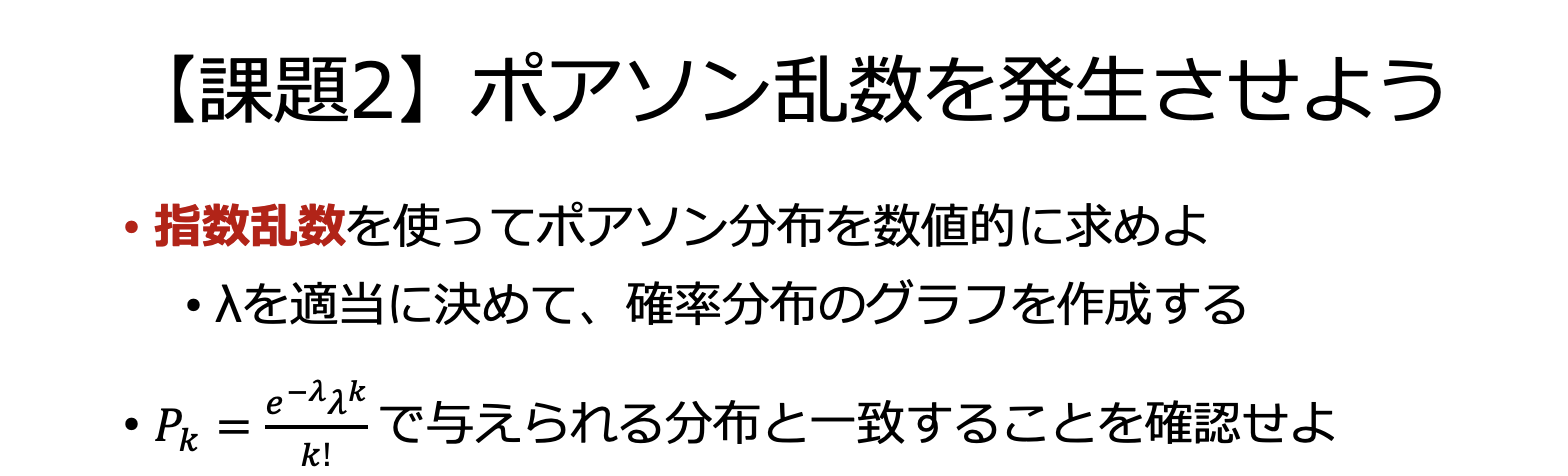

セル1: 逆関数法による一様分布からのポアソン乱数生成($\lambda = 4$)  
セル2: 生成結果からkごとに発生確率を計算，$\frac{e^{-\lambda}\lambda^k}{k!}$を計算  
セル3: グラフ描画(青: 数値的に求めた確率, オレンジ: $\frac{e^{-\lambda}\lambda^k}{k!}$)  

In [3]:
#逆関数法による一様分布からのポアソン乱数生成($\lambda = 4$)  
import numpy as np

lambda_ = 4
list_poisson = []

for i in range(10000):
    sum_ = 0
    n  = 0
    while(True):
        u = np.random.rand()
        x = - np.log(u)/lambda_
        sum_ += x
        if sum_ < 1:
            n += 1
        else:
            break
    list_poisson.append(n)

In [4]:
#生成結果からkごとに発生確率を計算，$\frac{e^{-\lambda}\lambda^k}{k!}$を計算  
import collections

cnt = collections.Counter(list_poisson)
x = np.arange(20)
y1 = [cnt[i]/10000 if i in cnt.keys() else 0 for i in x]

def poisson(lambda_, k):
    return (lambda_**k) * (np.exp(-lambda_))  / math.factorial(k)
y2 = [poisson(4, i) for i in x]

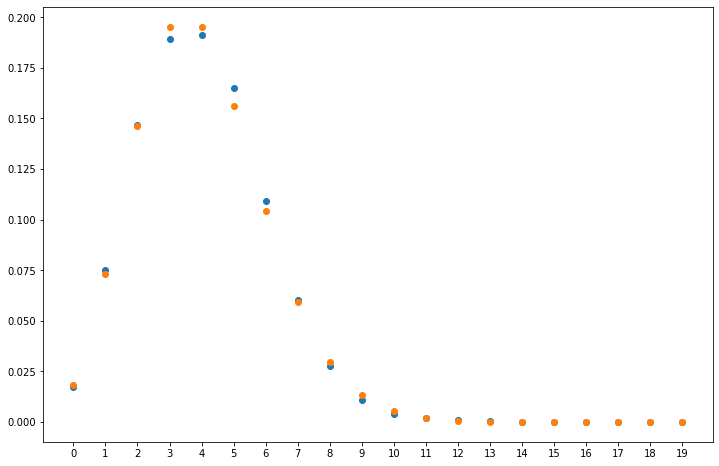

In [5]:
#グラフ描画(青: 数値的に求めた確率, オレンジ: $\frac{e^{-\lambda}\lambda^k}{k!}$)  
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.xticks(x)
plt.show()

## 参考
[PythonのCounterでリストの各要素の出現個数をカウント](https://note.nkmk.me/python-collections-counter/)
